<a href="https://colab.research.google.com/github/jscuteri/stock-market-analysis-machine-learning/blob/main/Finished%20Notebooks/%20SP500%2BVariableData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
import yfinance as yf 
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
# define the ticker you will use
xlb = yf.Ticker('XLB')
xle= yf.Ticker('XLE')
xlf= yf.Ticker('XLF')
xli= yf.Ticker('XLI')
xlk= yf.Ticker('XLI')
xlp= yf.Ticker('XLP')
xlu= yf.Ticker('XLU')
xlv=yf.Ticker('XLV')
xly= yf.Ticker('XLY')
#Display stock information, it will give you a summary description of the ticker
# xlb.info

In [ ]:
## Get SP&500 Sector Data


##XLB Materials DF
xlb_history= xlb.history(period="MAX")

xlb_df=pd.DataFrame(xlb_history)

xlb_df= xlb_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xlb_df= xlb_df.rename(columns={'Open': 'XLB_Open',
                        'Close':'XLB_Close',
                        'Volume':'XLB_Volume'})
# xlb_df

### XLE data 
xle_history= xle.history(period="MAX")

xle_df= pd.DataFrame(xle_history)

xle_df = xle_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xle_df= xle_df.rename(columns={'Open': 'XLE_Open',
                        'Close':'XLE_Close',
                        'Volume':'XLE_Volume'})

## XLF Data Finance
xlf_history= xlf.history(period="MAX")

xlf_df= pd.DataFrame(xlf_history)

xlf_df = xlf_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xlf_df= xlf_df.rename(columns={'Open': 'XLF_Open',
                        'Close':'XLF_Close',
                        'Volume':'XLF_Volume'})

## XLI Data Finance
xli_history= xli.history(period="MAX")

xli_df= pd.DataFrame(xli_history)

xli_df = xli_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xli_df= xli_df.rename(columns={'Open': 'XLI_Open',
                        'Close':'XLI_Close',
                        'Volume':'XLI_Volume'})

## XLK Data Finance
xlk_history= xlk.history(period="MAX")

xlk_df= pd.DataFrame(xlk_history)

xlk_df = xlk_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xlk_df= xlk_df.rename(columns={'Open': 'XLK_Open',
                        'Close':'XLK_Close',
                        'Volume':'XLK_Volume'})
## XLK Data Finance
xlp_history= xlp.history(period="MAX")

xlp_df= pd.DataFrame(xlp_history)

xlp_df = xlp_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xlp_df= xlp_df.rename(columns={'Open': 'XLP_Open',
                        'Close':'XLP_Close',
                        'Volume':'XLP_Volume'})

## XLU Data Finance
xlu_history= xlu.history(period="MAX")

xlu_df= pd.DataFrame(xlu_history)

xlu_df = xlu_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xlu_df= xlu_df.rename(columns={'Open': 'XLU_Open',
                        'Close':'XLU_Close',
                        'Volume':'XLU_Volume'})
## XLV Data Finance
xlv_history= xlv.history(period="MAX")

xlv_df= pd.DataFrame(xlv_history)

xlv_df = xlv_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xlv_df= xlv_df.rename(columns={'Open': 'XLV_Open',
                        'Close':'XLV_Close',
                        'Volume':'XLV_Volume'})
## XLY Data Finance
xly_history= xly.history(period="MAX")

xly_df= pd.DataFrame(xly_history)

xly_df = xly_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
xly_df= xly_df.rename(columns={'Open': 'XLY_Open',
                        'Close':'XLY_Close',
                        'Volume':'XLY_Volume'})


In [ ]:
#### Combine SP500 Sectors
Combined_SP500Sectors = xlb_df.merge(xle_df, how='left', on='Date')
Combined_SP500Sectors = Combined_SP500Sectors.merge(xlf_df, how='left', on='Date')
Combined_SP500Sectors = Combined_SP500Sectors.merge(xli_df, how='left', on='Date')
Combined_SP500Sectors = Combined_SP500Sectors.merge(xlk_df, how='left', on='Date')
Combined_SP500Sectors = Combined_SP500Sectors.merge(xlp_df, how='left', on='Date')
Combined_SP500Sectors = Combined_SP500Sectors.merge(xlu_df, how='left', on='Date')
Combined_SP500Sectors = Combined_SP500Sectors.merge(xlv_df, how='left', on='Date')
Combined_SP500Sectors_df = Combined_SP500Sectors.merge(xly_df, how='left', on='Date')
Combined_SP500Sectors_df

,XLB_Open,XLB_Close,XLB_Volume,XLE_Open,XLE_Close,XLE_Volume,XLF_Open,XLF_Close,XLF_Volume,XLI_Open,...,XLP_Volume,XLU_Open,XLU_Close,XLU_Volume,XLV_Open,XLV_Close,XLV_Volume,XLY_Open,XLY_Close,XLY_Volume
Date,,,,,,,,,,,,,,,,,,,,,
1998-12-22,12.433934,12.461981,1900,13.354484,13.327632,15200,12.094364,12.021846,55887,15.366189,...,150300,13.454704,13.267061,7900,17.836905,17.994158,5700,19.330962,19.450289,3700
1998-12-23,12.546119,12.592863,700,13.372388,13.605107,67800,11.973510,12.199121,78784,15.531757,...,44000,13.253160,13.211462,24100,18.106487,18.398527,18100,19.474160,19.533823,12000
1998-12-24,12.742444,12.882676,1500,13.640917,13.533508,12300,12.199115,12.279690,43824,15.831837,...,45500,13.440801,13.454700,23800,18.420996,18.510855,4900,19.808275,19.891804,1600
1998-12-28,12.863983,12.770494,2500,13.605101,13.461889,13500,12.271641,12.118549,51948,15.893917,...,25400,13.426895,13.385197,3100,18.454692,18.241278,15500,19.796341,19.712812,8600
1998-12-29,13.004216,13.004216,100,13.497698,13.596156,22000,12.134658,12.247464,100819,16.059472,...,123500,13.440812,13.607606,12000,18.241267,18.645630,5300,19.772474,20.142387,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,83.040001,83.379997,11229000,68.389999,70.580002,48190000,38.169998,38.520000,107353300,98.209999,...,20975100,67.169998,67.930000,18350600,128.850006,129.960007,17987400,174.460007,177.429993,16156700
2022-03-01,83.139999,81.459999,13131900,71.209999,71.290001,62115500,38.150002,37.099998,129873100,99.529999,...,18750300,67.790001,67.339996,16732300,129.279999,129.240005,14064200,177.169998,174.740005,13498800
2022-03-02,81.959999,83.250000,9571400,72.379997,72.919998,45454100,37.410000,38.060001,88182500,98.879997,...,18935000,67.370003,68.160004,14629900,129.809998,131.190002,12395600,175.369995,178.410004,10131400


In [ ]:
# for column in Combined_SP500Sectors_df.columns:
#     print(f"Column {column} has {Combined_SP500Sectors_df[column].isnull().sum()} null values")

## No Null Values for Combined_SP500Sectors_df

In [ ]:
### Variable to gauge off of VIX, Dow Jones, Gold, Russell 2k, Nasdaq 100, 10 Year Treasury, SP 500, 
vix= yf.Ticker('^VIX')
dia = yf.Ticker('DIA')
gld = yf.Ticker('GLD')
iwm = yf.Ticker('IWM')
qqq = yf.Ticker('QQQ')
tenyr= yf.Ticker('^TNX')
spy = yf.Ticker('SPY')

In [ ]:
#### Variable data turn into dataframes

## VIX  Data Finance
vix_history= vix.history(period="MAX")

vix_df= pd.DataFrame(vix_history)

vix_df = vix_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
vix_df= vix_df.rename(columns={'Open': 'VIX_Open',
                        'Close':'VIX_Close',
                        'Volume':'VIX_Volume'})
## DIA  Data Finance
dia_history= dia.history(period="MAX")

dia_df= pd.DataFrame(dia_history)

dia_df = dia_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
dia_df= dia_df.rename(columns={'Open': 'DIA_Open',
                        'Close':'DIA_Close',
                        'Volume':'DIA_Volume'})
## GLD  Data Finance
gld_history= gld.history(period="MAX")

gld_df= pd.DataFrame(gld_history)

gld_df = gld_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
gld_df= gld_df.rename(columns={'Open': 'GLD_Open',
                        'Close':'GLD_Close',
                        'Volume':'GLD_Volume'})
## GLD  Data Finance
gld_history= gld.history(period="MAX")

gld_df= pd.DataFrame(gld_history)

gld_df = gld_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
gld_df= gld_df.rename(columns={'Open': 'GLD_Open',
                        'Close':'GLD_Close',
                        'Volume':'GLD_Volume'})

## IWM
iwm_history= iwm.history(period="MAX")

iwm_df= pd.DataFrame(iwm_history)

iwm_df = iwm_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
iwm_df= iwm_df.rename(columns={'Open': 'IWM_Open',
                        'Close':'IWM_Close',
                        'Volume':'IWM_Volume'})
## QQQ
qqq_history= qqq.history(period="MAX")

qqq_df= pd.DataFrame(qqq_history)

qqq_df = qqq_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
qqq_df= qqq_df.rename(columns={'Open': 'QQQ_Open',
                        'Close':'QQQ_Close',
                        'Volume':'QQQ_Volume'})
## 10 Year
tenyr_history= tenyr.history(period="MAX")

tenyr_df= pd.DataFrame(tenyr_history)

tenyr_df = tenyr_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
tenyr_df= tenyr_df.rename(columns={'Open': '10YR_Open',
                        'Close':'10YR_Close',
                        'Volume':'10YR_Volume'})

### SPY 
spy_history= tenyr.history(period="MAX")

spy_df= pd.DataFrame(spy_history)

spy_df = spy_df.drop(columns=['High','Low', 'Dividends','Stock Splits'])
spy_df= spy_df.rename(columns={'Open': 'SPY_Open',
                        'Close':'SPY_Close',
                        'Volume':'SPY_Volume'})


,SPY_Open,SPY_Close,SPY_Volume
Date,,,
1962-01-02,4.060,4.060,0
1962-01-03,4.030,4.030,0
1962-01-04,3.990,3.990,0
1962-01-05,4.020,4.020,0
1962-01-08,4.030,4.030,0
...,...,...,...
2022-02-28,1.917,1.839,0
2022-03-01,1.734,1.707,0
2022-03-02,1.777,1.865,0


In [ ]:
### Combine the Stock Market Variables into DF
Combined_Variables = vix_df.merge(dia_df, how='left', on='Date')
Combined_Variables = Combined_Variables.merge(gld_df, how='left', on='Date')
Combined_Variables = Combined_Variables.merge(iwm_df, how='left', on='Date')
Combined_Variables = Combined_Variables.merge(qqq_df, how='left', on='Date')
Combined_Variables = Combined_Variables.merge(tenyr_df, how='left', on='Date')
Combined_Variables = Combined_Variables.merge(spy_df, how='left', on='Date')
Combined_Variables.columns

Index(['VIX_Open', 'VIX_Close', 'VIX_Volume', 'DIA_Open', 'DIA_Close',
       'DIA_Volume', 'GLD_Open', 'GLD_Close', 'GLD_Volume', 'IWM_Open',
       'IWM_Close', 'IWM_Volume', 'QQQ_Open', 'QQQ_Close', 'QQQ_Volume',
       '10YR_Open', '10YR_Close', '10YR_Volume', 'SPY_Open', 'SPY_Close',
       'SPY_Volume'],
      dtype='object')

In [ ]:
for column in Combined_Variables.columns:
    print(f"Column {column} has {Combined_Variables[column].isnull().sum()} null values")

Column VIX_Open has 0 null values
Column VIX_Close has 0 null values
Column VIX_Volume has 0 null values
Column DIA_Open has 2035 null values
Column DIA_Close has 2035 null values
Column DIA_Volume has 2035 null values
Column GLD_Open has 3754 null values
Column GLD_Close has 3754 null values
Column GLD_Volume has 3754 null values
Column IWM_Open has 2629 null values
Column IWM_Close has 2629 null values
Column IWM_Volume has 2629 null values
Column QQQ_Open has 2321 null values
Column QQQ_Close has 2321 null values
Column QQQ_Volume has 2321 null values
Column 10YR_Open has 32 null values
Column 10YR_Close has 32 null values
Column 10YR_Volume has 32 null values
Column SPY_Open has 32 null values
Column SPY_Close has 32 null values
Column SPY_Volume has 32 null values


In [ ]:
Combined_Variables= Combined_Variables.dropna()
len(Combined_Variables)

4347

In [ ]:
df= Combined_Variables.merge(Combined_SP500Sectors_df, how='left', on='Date')
df

,VIX_Open,VIX_Close,VIX_Volume,DIA_Open,DIA_Close,DIA_Volume,GLD_Open,GLD_Close,GLD_Volume,IWM_Open,...,XLP_Volume,XLU_Open,XLU_Close,XLU_Volume,XLV_Open,XLV_Close,XLV_Volume,XLY_Open,XLY_Close,XLY_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2004-11-18,13.220000,12.98,0,70.872831,70.926361,4714100.0,44.430000,44.380001,5992000.0,49.231979,...,577400,14.810419,14.859227,2195700,21.467481,21.445110,238300,27.073414,27.176779,443200
2004-11-19,12.790000,13.50,0,70.923645,70.191986,6968500.0,44.490002,44.779999,11655300.0,49.128851,...,1000400,14.956840,14.804994,1914000,21.348176,21.184132,839300,27.224473,26.834869,661800
2004-11-22,13.710000,12.97,0,70.057739,70.346375,8335900.0,44.750000,44.950001,11996000.0,48.442769,...,248100,14.859227,15.038188,645300,21.251240,21.221413,292900,26.755361,27.001842,1544000
2004-11-23,12.780000,12.67,0,70.366534,70.473930,7527500.0,44.880001,44.750000,3169200.0,49.148698,...,459700,15.130376,15.130376,972300,21.251241,21.154306,162900,27.073405,27.152918,114600
2004-11-24,12.580000,12.72,0,70.493996,70.500710,6210400.0,44.930000,45.049999,6105100.0,49.493728,...,186600,15.157498,15.184613,998300,21.251246,21.206507,302400,27.311937,27.335793,2217200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28,32.439999,30.15,0,335.950012,339.339996,8212100.0,178.860001,178.380005,16035900.0,200.470001,...,20975100,67.169998,67.930000,18350600,128.850006,129.960007,17987400,174.460007,177.429993,16156700
2022-03-01,29.450001,33.32,0,337.269989,333.160004,8532900.0,179.050003,181.619995,21942100.0,202.660004,...,18750300,67.790001,67.339996,16732300,129.279999,129.240005,14064200,177.169998,174.740005,13498800
2022-03-02,34.200001,30.74,0,335.269989,339.000000,6836200.0,180.130005,179.729996,19727200.0,200.839996,...,18935000,67.370003,68.160004,14629900,129.809998,131.190002,12395600,175.369995,178.410004,10131400


In [ ]:
# for column in df.columns:
#     print(f"Column {column} has {df[column].isnull().sum()} null values")

In [ ]:
# defining x and y 
x = df.index
y = df['Close']
y

Date
2014-12-04    28447.699219
2014-12-05    26056.500000
2014-12-08    23582.800781
2014-12-09    21274.000000
2014-12-10    19295.000000
                  ...     
2018-01-22     9800.000000
2018-01-23     9900.000000
2018-01-26     9300.000000
2018-01-30     9300.000000
2018-01-31     9300.000000
Name: Close, Length: 787, dtype: float64

In [ ]:
# Data Exploration
# i like to set up a plot function so i can reuse it at later stages of this analysis 
def df_plot(data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

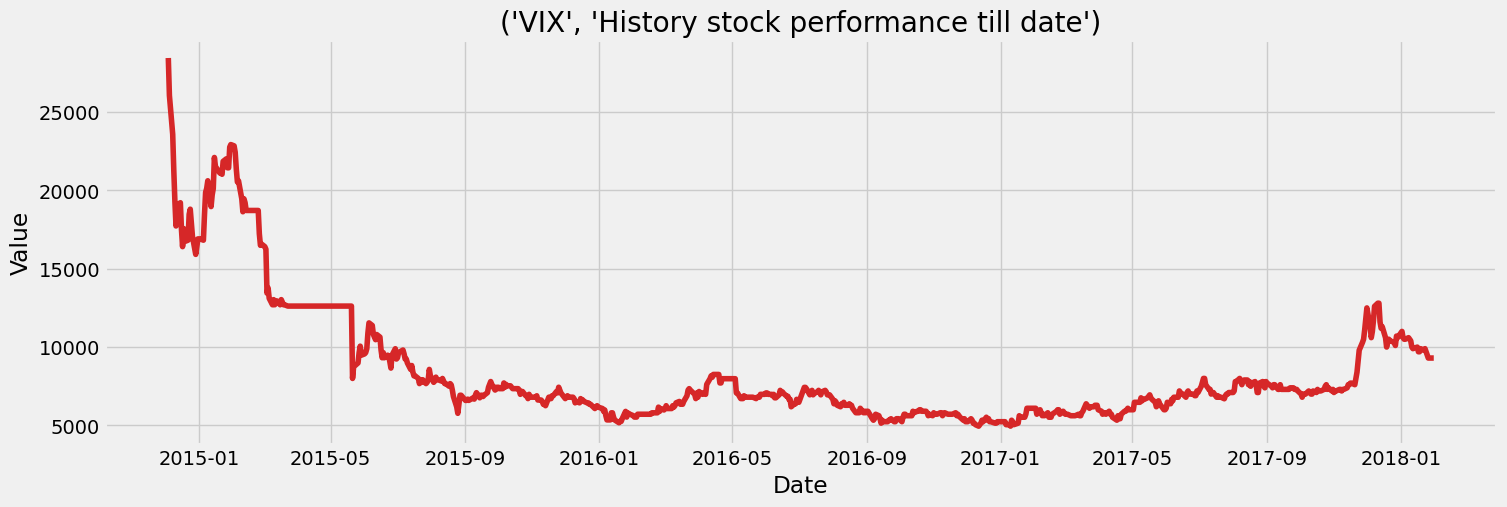

In [ ]:
stock_name= "VIX"
title = (stock_name,"History stock performance till date")
df_plot(df , x , y , title=title,xlabel='Date', ylabel='Value',dpi=100)

In [ ]:
# Data Processing and scaling
df.reset_index(inplace=True)

In [ ]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-12-04,28200.400391,30096.900391,27953.0,28447.699219,811330,0,0
1,2014-12-05,26551.199219,27540.699219,25974.0,26056.500000,377529,0,0


In [ ]:
df.drop(columns=['Dividends','Stock Splits']).head(2)

,Date,Open,High,Low,Close,Volume
0,2014-12-04,28200.400391,30096.900391,27953.0,28447.699219,811330
1,2014-12-05,26551.199219,27540.699219,25974.0,26056.500000,377529


In [ ]:
df['Date'] = pd.to_datetime(df.Date)

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,787.000000,787.000000,787.000000,787.000000,7.870000e+02,787.0,787.0
mean,8331.107509,8545.897650,8142.643890,8333.473038,8.624797e+05,0.0,0.0
std,3825.637632,3988.629840,3699.335491,3816.967265,8.331270e+05,0.0,0.0
min,4857.140137,5047.620117,4571.430176,4952.379883,0.000000e+00,0.0,0.0
25%,6077.100098,6167.799805,5986.390137,6077.100098,2.416590e+05,0.0,0.0
50%,7074.830078,7200.000000,6893.419922,7000.000000,6.472780e+05,0.0,0.0
75%,8204.494873,8509.584961,7990.104980,8253.969727,1.210874e+06,0.0,0.0
max,28200.400391,30096.900391,27953.000000,28447.699219,4.583569e+06,0.0,0.0


In [ ]:
df.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends                int64
Stock Splits             int64
dtype: object

In [ ]:
x = df[['Open', 'High','Low', 'Volume']]
y = df['Close']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()

In [ ]:
# Polynominal & Linear regression Model for stock prediction 
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.15 , shuffle=False,random_state = 0)

In [ ]:
print(train_x.shape )
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(668, 4)
(119, 4)
(668,)
(119,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [-5.13227437e-01  7.29940512e-01  7.73423172e-01  5.83720338e-06]
regression intercept 60.51427267431791


In [ ]:
# the coefficient of determination R² 
regression_confidence = regression.score(test_x, test_y)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.9822107923876268


In [ ]:
predicted=regression.predict(test_x)
print(test_x.head())

       Open    High     Low   Volume
668  8100.0  8400.0  7800.0  1882049
669  8000.0  8300.0  7800.0  1854859
670  7800.0  7800.0  7300.0   522810
671  7500.0  8100.0  7400.0  1250267
672  7800.0  7900.0  7600.0   806378


In [ ]:
predicted.shape

(119,)

In [ ]:
dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr.head(10)

,Actual_Price,Predicted_Price
668,8000.0,8078.558973
669,7800.0,8056.728952
670,7600.0,7399.917156
671,7800.0,7854.456173
672,7900.0,7706.593403
673,7900.0,7856.065346
674,7600.0,7651.331288
675,7800.0,7578.044206
676,7500.0,7552.547218
677,7700.0,7557.831021


In [ ]:
dfr.describe()

,Actual_Price,Predicted_Price
count,119.000000,119.000000
mean,8552.941176,8500.226167
std,1654.927083,1586.344698
min,6800.000000,6859.474896
25%,7300.000000,7289.879692
50%,7600.000000,7581.969094
75%,10000.000000,10075.158916
max,12800.000000,12311.708378


In [ ]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))

Mean Absolute Error (MAE): 150.15296228716485
Mean Squared Error (MSE) : 48311.37252712728
Root Mean Squared Error (RMSE): 219.79848163062292


In [ ]:
dfr.describe()

,Actual_Price,Predicted_Price
count,119.000000,119.000000
mean,8552.941176,8500.226167
std,1654.927083,1586.344698
min,6800.000000,6859.474896
25%,7300.000000,7289.879692
50%,7600.000000,7581.969094
75%,10000.000000,10075.158916
max,12800.000000,12311.708378


In [ ]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  100.62016007783572


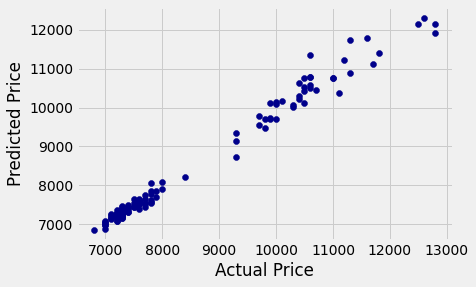

In [ ]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price,  color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

No handles with labels found to put in legend.


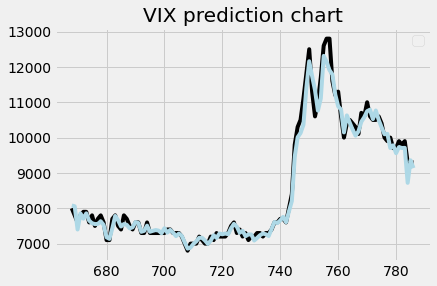

In [ ]:
plt.plot(dfr.Actual_Price, color='black')
plt.plot(dfr.Predicted_Price, color='lightblue')
plt.title("VIX prediction chart")
plt.legend();

Polynominal regression

In [ ]:
#Convert the pandas series into numpy array, we need to further 
#massage it before sending it to regression model
yp = np.asarray(df['Close'])
Xp = np.asarray(df.index.values)

In [ ]:
#Convert dimension x in the higher degree polynomial expression
X_transform = poly.fit_transform(Xp.reshape(-1, 1))

In [ ]:
#Fit the data(train the model)
poly_reg_model.fit(X_transform, yp.reshape(-1, 1))

LinearRegression()

In [ ]:
# Prediction for historical dates. Let's call it learned values.
y_learned = poly_reg_model.predict(X_transform)

In [ ]:
#Now, add future dates to the date index and pass that index to 
#the regression model for future prediction.
#As we have converted date index into a range index, hence, here we 
#just need to add 3650 days ( roughly 10 yrs)
#to the previous index. x[-1] gives the last value of the series.
newindex = np.asarray(pd.RangeIndex(start=Xp[-1], stop=Xp[-1] + 3650))

In [ ]:
#Convert the extended dimension x in the higher degree polynomial expression
X_extended_transform = poly.fit_transform(newindex.reshape(-1, 1))

In [ ]:
#Prediction for future dates. Let's call it predicted values.
y_predict = poly_reg_model.predict(X_extended_transform)

In [ ]:
#Print the last predicted value
print ("Closing price at 2029 would be around ", y_predict[-1])

Closing price at 2029 would be around  [956224.25059538]


In [ ]:
#Convert the days index back to dates index for plotting the graph
Xp = pd.to_datetime(df.index, origin='2022-04-03', unit='D')
future_x = pd.to_datetime(newindex, origin='2022-05-03', unit='D')

In [ ]:
#Setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

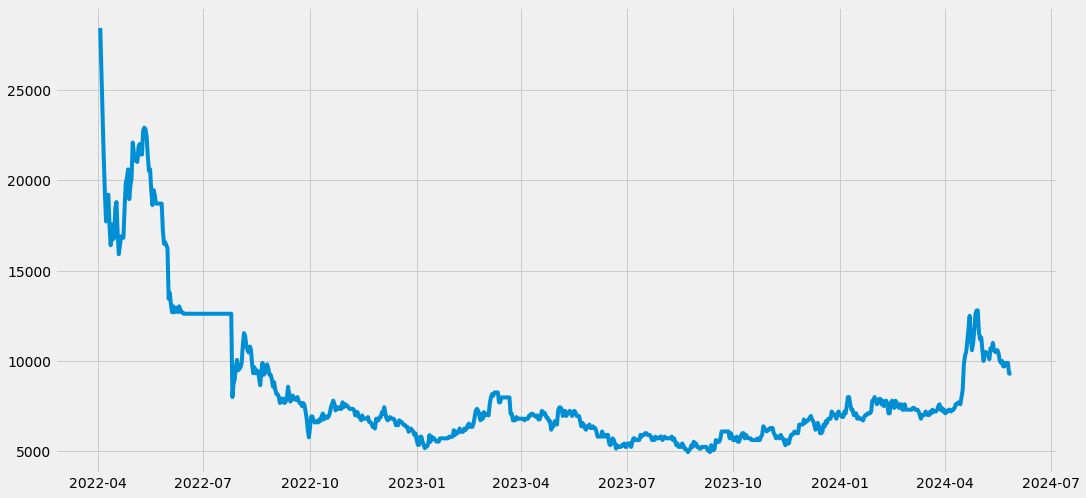

In [ ]:
#Plot the actual data
plt.figure(figsize=(16,8))
plt.plot(Xp,df['Close'], label='Close Price History')

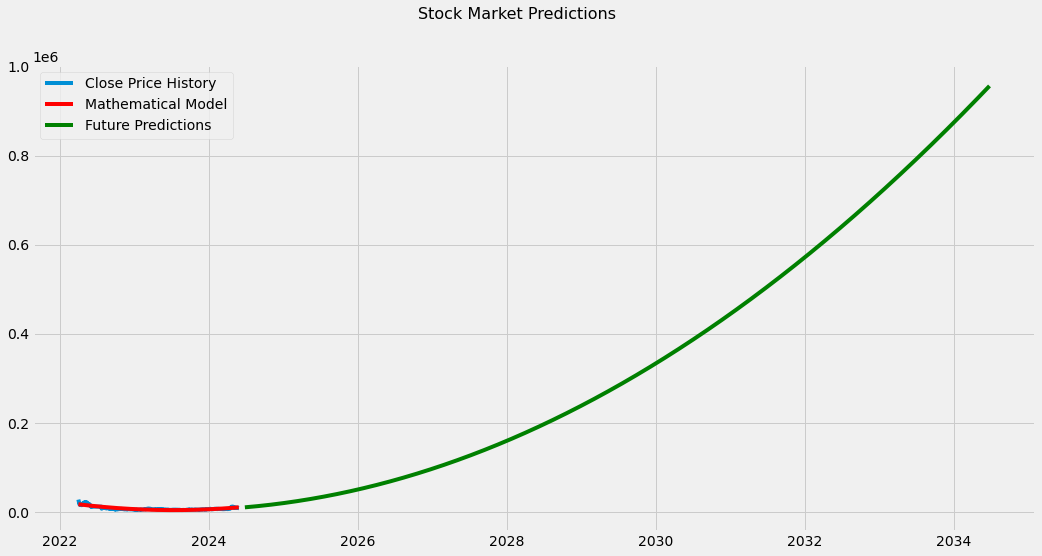

In [ ]:
#Setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
#Plot the actual data
plt.figure(figsize=(16,8))
plt.plot(Xp,df['Close'], label='Close Price History')

#Plot the regression model
plt.plot(Xp,y_learned, color='r', label='Mathematical Model')

#Plot the future predictions
plt.plot(future_x,y_predict, color='g', label='Future Predictions')

#Set the title of the graph
plt.suptitle('Stock Market Predictions', fontsize=16)

#Set the title of the graph window
fig = plt.gcf()
fig.canvas.set_window_title('Stock Market Predictions')

#display the legends
plt.legend()
#display the graph
plt.show()